# Clustering drills

Welcome, traveller, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [pokemon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

in the example, we wanted to determine the **most physically diverse** [pokemon](./assets/pokemon.csv) team there is. To do so, we clustered the pokemon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The pokemon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the pokemon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualise these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar pokemon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** pokemon groups from which you can determine your pokemon team similar to the method described in the example.

In [1]:
# cluster your pokemon here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

pokemon = pd.read_csv("./assets/pokemon.csv")
pokemon.T

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Shield Dust', 'Run Away']",...,['Shadow Shield'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Prism Armor'],['Soul-Heart']
against_bug,1,1,1,0.5,0.5,0.25,1,1,1,1,...,1,0.5,0.5,0.5,1,0.25,1,2,2,0.25
against_dark,1,1,1,1,1,1,1,1,1,1,...,4,1,0.5,0.5,1,1,1,0.5,2,0.5
against_dragon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.5,0.5,2,1,0
against_electric,0.5,0.5,0.5,1,1,2,2,2,2,1,...,1,1,1,1,0.5,2,0.5,0.5,1,1
against_fairy,0.5,0.5,0.5,0.5,0.5,0.5,1,1,1,1,...,1,0.5,2,2,1,0.5,0.5,4,1,0.5
against_fight,0.5,0.5,0.5,1,1,0.5,1,1,1,0.5,...,0,1,0.5,0.5,1,1,2,2,0.5,1
against_fire,2,2,2,0.5,0.5,0.5,0.5,0.5,0.5,2,...,1,0.5,2,2,1,2,4,0.5,1,2
against_flying,2,2,2,1,1,1,1,1,1,2,...,1,0.5,4,4,0.5,0.5,1,1,1,0.5
against_ghost,1,1,1,1,1,1,1,1,1,1,...,4,1,1,1,1,1,1,0.5,2,1


In [18]:
x = pokemon[['height_m', 'weight_kg', 'hp', 'attack', 'defense', 'speed']]
x = x.reset_index(drop=True)
x.head(5)

,height_m,weight_kg,hp,attack,defense,speed
0,0.7,6.9,45,49,49,45
1,1.0,13.0,60,62,63,60
2,2.0,100.0,80,100,123,80
3,0.6,8.5,39,52,43,65
4,1.1,19.0,58,64,58,80


In [19]:
print(x.isnull().sum())

height_m     20
weight_kg    20
hp            0
attack        0
defense       0
speed         0
dtype: int64


In [20]:
x.dropna(inplace=True)
print(x.isnull().sum())

height_m     0
weight_kg    0
hp           0
attack       0
defense      0
speed        0
dtype: int64


In [10]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)

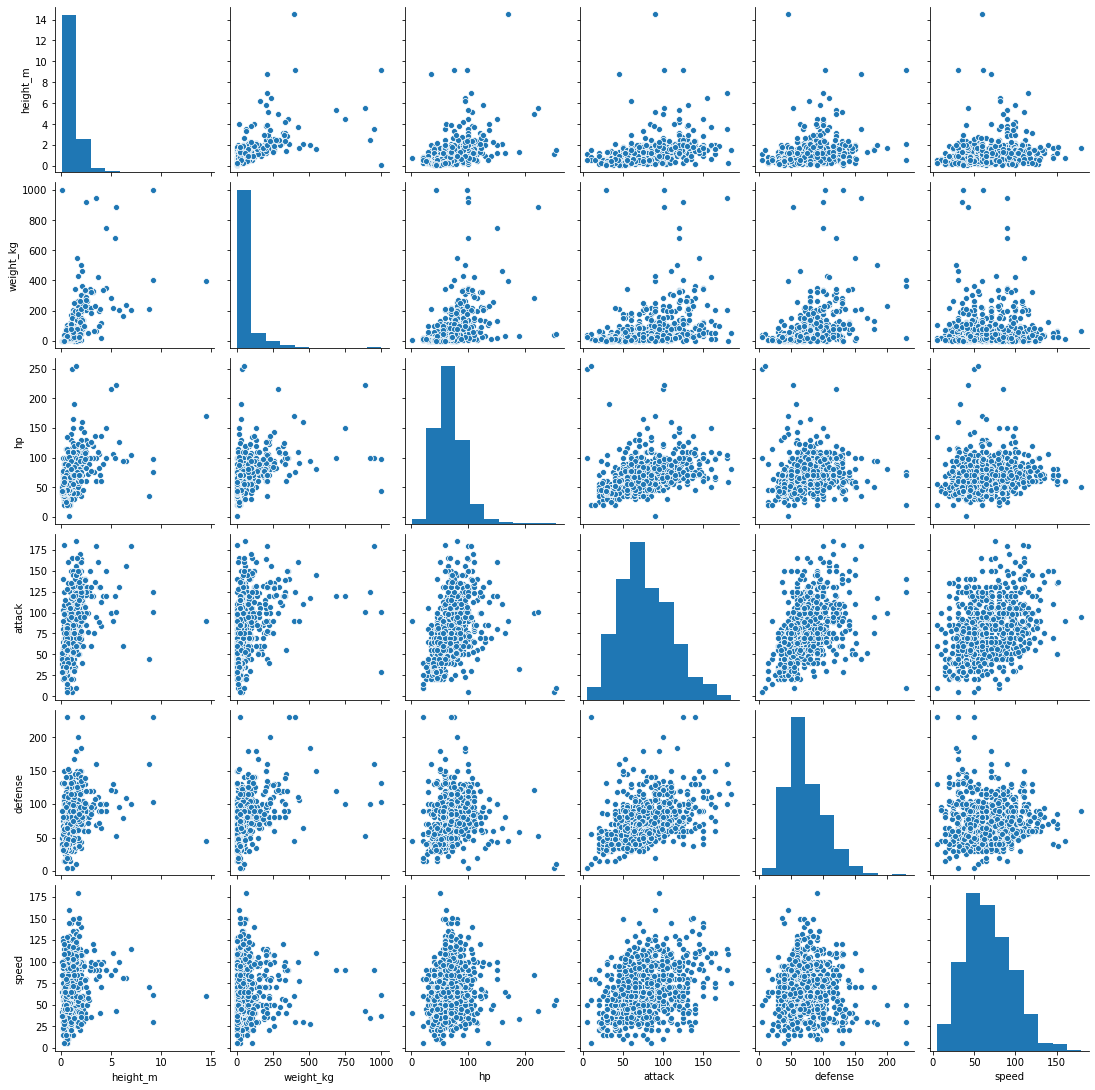

In [11]:
sns.pairplot(x)
plt.show()

In [12]:
# determine your final pokemon here

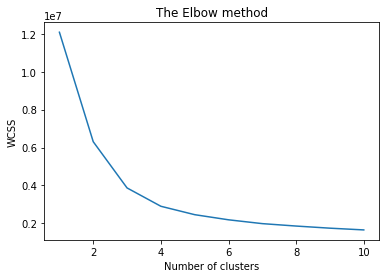

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                   random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()  # in case you don't know how many clusters, but we do know

In [21]:
# number of pokemon clusters
team_size = 6 # we do know how many pokémon we can have in our team

# make new dataframe with relevant metrics
pokemon_metrics = x[['height_m', 'weight_kg', 'hp', 'attack', 'defense', 'speed']]

# z-score standardization
pokemon_metrics_standardized=(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_standardized = pokemon_metrics_standardized.rename(columns={'weight_kg': 'weight_zscore',
                                                                        'height_m':'height_zscore',
                                                                        'hp': 'hp_zscore',
                                                                        'attack': 'attack_zscore',
                                                                        'defense': 'defense_zscore',
                                                                        'speed': 'speed_zscore'})

# weighted features (kies ik zelf)
#pokemon_metrics_standardized.hp_zscore = (pokemon_metrics_standardized.hp_zscore)*2
#pokemon_metrics_standardized.attack_zscore = (pokemon_metrics_standardized.attack_zscore)*2
#pokemon_metrics_standardized.defense_zscore = (pokemon_metrics_standardized.defense_zscore)*2
#pokemon_metrics_standardized.speed_zscore = (pokemon_metrics_standardized.speed_zscore)*2

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_metrics_standardized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())

pokemon_metrics_standardized.head(5) # all pokemon are standardized (mean = 0 ; stdv = 1) but weighted differently

,height_zscore,weight_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster
0,-0.429400,-0.498178,-0.907100,-0.890461,-0.779152,-0.736195,4.0
1,-0.151706,-0.442396,-0.343650,-0.487032,-0.324695,-0.217239,4.0
2,0.773940,0.353180,0.407618,0.692223,1.622977,0.474702,5.0
3,-0.521965,-0.483546,-1.132480,-0.797362,-0.973919,-0.044254,4.0
4,-0.059142,-0.387529,-0.418776,-0.424966,-0.487001,0.474702,4.0


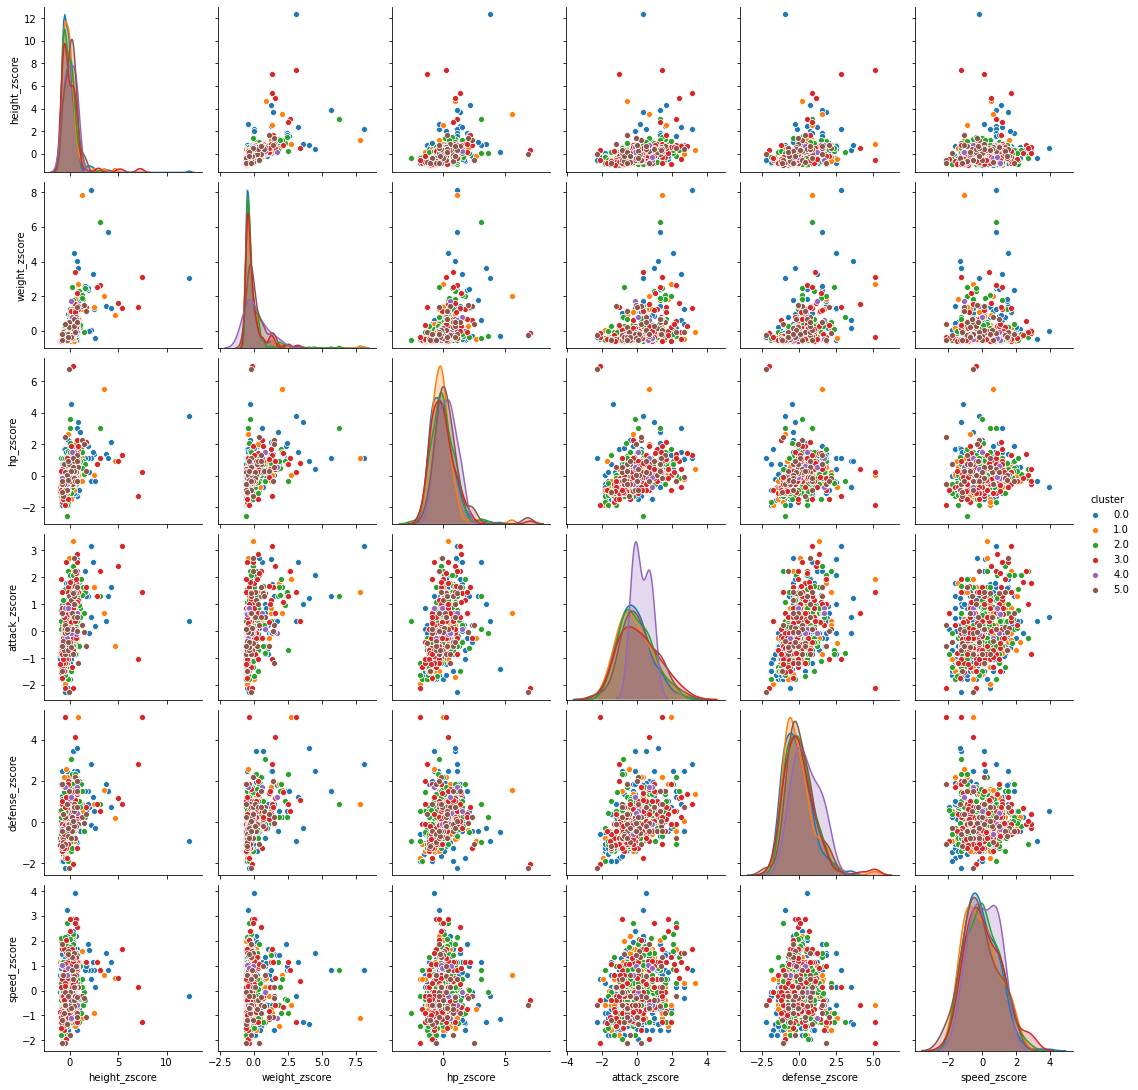

In [49]:
sns.pairplot(data=pokemon_metrics_standardized, vars=['height_zscore', 'weight_zscore', 'hp_zscore',
                                                   'attack_zscore', 'defense_zscore', 'speed_zscore'],
            hue='cluster')

plt.show()

### Eucledian distance (method 1)

In [22]:
import numpy as np        
        
def distance_to_other_clusters(pokemon):
    if not pokemon.loc[pokemon.isin(['weight_zscore', 'height_zscore', 'hp_zscore', 'attack_zscore', 
                                     'defense_zscore', 'speed_zscore', 'cluster'])].all():
        return
    metric = np.array([pokemon['weight_zscore'], pokemon['height_zscore'], pokemon['hp_zscore'],
                      pokemon['attack_zscore'], pokemon['defense_zscore'], pokemon['speed_zscore']])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [23]:
chosen_pokemon #vanuit elke cluster 1 pokemon (meest diverse team van 6 pokemons na normalisatie
#en gewicht toekennen aan de features die ik belangrijker vind dan andere)

,height_zscore,weight_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
486,3.088056,6.297137,3.037054,1.312884,0.876369,0.820672,0.0,33.309199,Giratina
241,0.311117,-0.133310,6.981208,-2.100749,-2.045139,-0.390225,1.0,42.280080,Blissey
112,-0.059142,-0.244874,6.793391,-2.255914,-2.207445,-0.563210,2.0,41.208313,Chansey
302,-0.521965,-0.456113,-0.719283,0.847388,1.687899,-0.563210,3.0,13.614062,Mawile
320,12.344519,3.078255,3.788321,0.381893,-0.908997,-0.217239,4.0,57.587734,Wailord
749,1.236763,7.851710,1.158885,1.468049,0.876369,-1.082166,5.0,38.094853,Mudsdale


### Euclidean distance (method 2)

In [24]:
import numpy as np        
        
def distance_to_other_clusters(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'],
                      single_pokemon['hp_zscore'], single_pokemon['attack_zscore'],
                       single_pokemon['defense_zscore'], single_pokemon['speed_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon2 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon2 = chosen_pokemon2.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [25]:
chosen_pokemon2

,height_zscore,weight_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
486,3.088056,6.297137,3.037054,1.312884,0.876369,0.820672,0.0,33.309199,Giratina
241,0.311117,-0.133310,6.981208,-2.100749,-2.045139,-0.390225,1.0,42.280080,Blissey
112,-0.059142,-0.244874,6.793391,-2.255914,-2.207445,-0.563210,2.0,41.208313,Chansey
302,-0.521965,-0.456113,-0.719283,0.847388,1.687899,-0.563210,3.0,13.614062,Mawile
320,12.344519,3.078255,3.788321,0.381893,-0.908997,-0.217239,4.0,57.587734,Wailord
749,1.236763,7.851710,1.158885,1.468049,0.876369,-1.082166,5.0,38.094853,Mudsdale


## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - manhattan distance
    - squared distance
    - 1/(squared distance)

### Manhattan distance (method 3)

In [26]:
# Assign dissimilarity to your pokemon here
import numpy as np        
        
def distance_to_other_clusters_manhattan(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'],
                      single_pokemon['hp_zscore'], single_pokemon['attack_zscore'],
                       single_pokemon['defense_zscore'], single_pokemon['speed_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(abs(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_manhattan, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon3 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon3 = chosen_pokemon3.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [27]:
chosen_pokemon3

,height_zscore,weight_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
486,3.088056,6.297137,3.037054,1.312884,0.876369,0.820672,0.0,64.980828,Giratina
207,7.438593,3.096544,0.219801,1.468049,5.096325,-1.255151,1.0,79.111908,Steelix
112,-0.059142,-0.244874,6.793391,-2.255914,-2.207445,-0.563210,2.0,73.686144,Chansey
769,0.125987,1.724862,0.595435,-0.083602,1.200981,-1.082166,3.0,27.450418,Palossand
320,12.344519,3.078255,3.788321,0.381893,-0.908997,-0.217239,4.0,92.883869,Wailord
749,1.236763,7.851710,1.158885,1.468049,0.876369,-1.082166,5.0,62.294468,Mudsdale


### Squared distance (method 4)

In [28]:
import numpy as np        
        
def distance_to_other_clusters_squared_distance(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'],
                      single_pokemon['hp_zscore'], single_pokemon['attack_zscore'],
                       single_pokemon['defense_zscore'], single_pokemon['speed_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_squared_distance,
                                                           axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon4 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon4 = chosen_pokemon4.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [29]:
chosen_pokemon4

,height_zscore,weight_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
486,3.088056,6.297137,3.037054,1.312884,0.876369,0.820672,0.0,238.561214,Giratina
207,7.438593,3.096544,0.219801,1.468049,5.096325,-1.255151,1.0,363.450788,Steelix
112,-0.059142,-0.244874,6.793391,-2.255914,-2.207445,-0.563210,2.0,348.639267,Chansey
302,-0.521965,-0.456113,-0.719283,0.847388,1.687899,-0.563210,3.0,41.669247,Mawile
320,12.344519,3.078255,3.788321,0.381893,-0.908997,-0.217239,4.0,695.867966,Wailord
749,1.236763,7.851710,1.158885,1.468049,0.876369,-1.082166,5.0,296.954480,Mudsdale


### 1/squared distance (method 5)

In [30]:
import numpy as np        
        
def distance_to_other_clusters_1_squared_distance(single_pokemon):
    metric = np.array([single_pokemon['weight_zscore'], single_pokemon['height_zscore'],
                      single_pokemon['hp_zscore'], single_pokemon['attack_zscore'],
                       single_pokemon['defense_zscore'], single_pokemon['speed_zscore']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += 1/sum(np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters_1_squared_distance,
                                                           axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon5 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon5 = chosen_pokemon5.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [31]:
chosen_pokemon5 #verschillende pokemon

,height_zscore,weight_zscore,hp_zscore,attack_zscore,defense_zscore,speed_zscore,cluster,dissimilarity,name
53,-0.336836,-0.382042,-0.719283,-0.797362,-0.811613,-0.390225,0.0,24.524343,Psyduck
514,-0.521965,-0.437824,-0.719283,-0.766329,-0.811613,-0.078851,1.0,6.238144,Panpour
270,0.033423,-0.264077,-0.343650,-0.859428,-0.746691,-0.563210,2.0,2.963944,Lombre
778,-0.244271,-0.387529,-0.043143,0.847388,-0.097467,0.889866,3.0,2.864965,Bruxish
513,-0.151706,-0.305228,0.219801,0.630157,-0.324695,1.201240,4.0,3.441920,Simisear
360,-0.429400,-0.407647,-0.719283,-0.859428,-0.746691,-0.563210,5.0,30.890251,Snorunt


Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse pokémon team** possible...or is it?

We have clustered our pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **pokémon type**?

Some of the chosen pokémon may have the same type, as this data was ignored during clustering? But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the pokémon into 6 groups according to similar:
    - weight
    - height
    - primary pokémon type
    - secondary pokémon type
- determine the most dissimilar pokemon team from these clusters

But wait, these pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 pokémon types, and pokémon can only have one type. Vectorising a **grass**, **fire**, and **water** pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

In [32]:
# vectorize your pokémon type data here (there are modules that vectorize data)

In [33]:
X = pokemon[['height_m', 'weight_kg', 'type1', 'type2']]
X.head(5)

,height_m,weight_kg,type1,type2
0,0.7,6.9,grass,poison
1,1.0,13.0,grass,poison
2,2.0,100.0,grass,poison
3,0.6,8.5,fire,NaN
4,1.1,19.0,fire,NaN


In [34]:
print(X.isnull().sum()) #check nan values

height_m      20
weight_kg     20
type1          0
type2        384
dtype: int64


In [35]:
X.type2.fillna('Unknown', inplace=True) #type 2 nan values replace them with unknown

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [36]:
print(X.isnull().sum()) 

height_m     20
weight_kg    20
type1         0
type2         0
dtype: int64


In [37]:
X.dropna(inplace=True) #drop the other values
print(X.isnull().sum())

height_m     0
weight_kg    0
type1        0
type2        0
dtype: int64


<ipython-input-37-8661a73c97cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True) #drop the other values


In [38]:
X.type1.unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'fairy', 'fighting', 'psychic', 'ghost', 'rock', 'ground', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [39]:
X.type2.unique()

array(['poison', 'Unknown', 'flying', 'ground', 'fairy', 'grass',
       'fighting', 'psychic', 'steel', 'ice', 'rock', 'water', 'electric',
       'fire', 'dragon', 'dark', 'ghost', 'bug', 'normal'], dtype=object)

In [40]:
#OneHotEncoder zou hier ook werken maar dan moet je wel dataframe.values gebruiken 
df = pd.get_dummies(data=X, columns=['type1', 'type2']) 
df

,height_m,weight_kg,type1_bug,type1_dark,type1_dragon,type1_electric,type1_fairy,type1_fighting,type1_fire,type1_flying,...,type2_ghost,type2_grass,type2_ground,type2_ice,type2_normal,type2_poison,type2_psychic,type2_rock,type2_steel,type2_water
0,0.7,6.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,13.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,100.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.6,8.5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.1,19.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,9.2,999.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0.3,0.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
798,5.5,888.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
799,2.4,230.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# cluster your multi-dimensional pokémon data here

In [42]:
# number of pokemon clusters
team_size = 6 # we do know how many pokémon we can have in our team

# make new dataframe with relevant metrics
pokemon_metrics = df #gemakkelijker om dataframe te gebruiken dan ndarray

# z-score standardization
pokemon_metrics_standardized=(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_standardized=pokemon_metrics_standardized.add_suffix("_zscore")

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_metrics_standardized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())

pokemon_metrics_standardized.head(5)

,height_m_zscore,weight_kg_zscore,type1_bug_zscore,type1_dark_zscore,type1_dragon_zscore,type1_electric_zscore,type1_fairy_zscore,type1_fighting_zscore,type1_fire_zscore,type1_flying_zscore,...,type2_grass_zscore,type2_ground_zscore,type2_ice_zscore,type2_normal_zscore,type2_poison_zscore,type2_psychic_zscore,type2_rock_zscore,type2_steel_zscore,type2_water_zscore,cluster
0,-0.429400,-0.498178,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,4.834902,-0.19271,-0.135017,-0.170142,-0.149073,0.0
1,-0.151706,-0.442396,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,4.834902,-0.19271,-0.135017,-0.170142,-0.149073,0.0
2,0.773940,0.353180,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,4.834902,-0.19271,-0.135017,-0.170142,-0.149073,0.0
3,-0.521965,-0.483546,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,3.821162,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,1.0
4,-0.059142,-0.387529,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,3.821162,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,1.0


In [43]:
pokemon_metrics_standardized.columns

Index(['height_m_zscore', 'weight_kg_zscore', 'type1_bug_zscore',
       'type1_dark_zscore', 'type1_dragon_zscore', 'type1_electric_zscore',
       'type1_fairy_zscore', 'type1_fighting_zscore', 'type1_fire_zscore',
       'type1_flying_zscore', 'type1_ghost_zscore', 'type1_grass_zscore',
       'type1_ground_zscore', 'type1_ice_zscore', 'type1_normal_zscore',
       'type1_poison_zscore', 'type1_psychic_zscore', 'type1_rock_zscore',
       'type1_steel_zscore', 'type1_water_zscore', 'type2_Unknown_zscore',
       'type2_bug_zscore', 'type2_dark_zscore', 'type2_dragon_zscore',
       'type2_electric_zscore', 'type2_fairy_zscore', 'type2_fighting_zscore',
       'type2_fire_zscore', 'type2_flying_zscore', 'type2_ghost_zscore',
       'type2_grass_zscore', 'type2_ground_zscore', 'type2_ice_zscore',
       'type2_normal_zscore', 'type2_poison_zscore', 'type2_psychic_zscore',
       'type2_rock_zscore', 'type2_steel_zscore', 'type2_water_zscore',
       'cluster'],
      dtype='object')

In [44]:
def distance_to_other_clusters(pokemon):
    metric = np.array([pokemon[x] for x in pokemon_metrics_standardized.columns[:-1]])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon6 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon6 = chosen_pokemon6.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [45]:
chosen_pokemon6

,height_m_zscore,weight_kg_zscore,type1_bug_zscore,type1_dark_zscore,type1_dragon_zscore,type1_electric_zscore,type1_fairy_zscore,type1_fighting_zscore,type1_fire_zscore,type1_flying_zscore,...,type2_ice_zscore,type2_normal_zscore,type2_poison_zscore,type2_psychic_zscore,type2_rock_zscore,type2_steel_zscore,type2_water_zscore,cluster,dissimilarity,name
713,-0.614530,-0.488119,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,16.093517,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,0.0,90.587226,Noibat
714,0.311117,0.216012,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,16.093517,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,1.0,90.288756,Noivern
364,0.218552,0.815894,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,6.699525,2.0,49.223729,Walrein
667,0.311117,0.184006,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,3.821162,-0.062057,...,-0.119446,13.928434,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,3.0,74.630254,Pyroar
460,-0.059142,-0.250360,-0.318467,5.088991,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,8.361242,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,4.0,53.421477,Weavile
757,0.033423,-0.358266,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,5.0,51.972531,Salazzle


But wait, did you properly **standardize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example standardizes its data using the **z-score**. What does this mean? z-score or mean normalization means we are using our **problem space** where our data lives optimally. 

in the case of the pokemon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the euclidian distance between points of data would be larger.

For example, A pokemon weighing 200kg and measuring 4m is about **as similar** as another pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **pokémon types** into vectors of length one, the **euclidian distance** between one pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **pokémon type** matters more than **weight or height**?

In [46]:
# standardize and scale your data in such a way that pokémon type similarity matters more than the other metrics

In [47]:
# number of pokemon clusters
team_size = 6 # we do know how many pokémon we can have in our team

# make new dataframe with relevant metrics
pokemon_metrics = df #gemakkelijker om dataframe te gebruiken dan ndarray

# z-score standardization
pokemon_metrics_standardized=(pokemon_metrics-pokemon_metrics.mean())/pokemon_metrics.std()
pokemon_metrics_standardized=pokemon_metrics_standardized.add_suffix("_zscore")

# weighted features (kies ik zelf)
pokemon_metrics_standardized.height_m_zscore = (pokemon_metrics_standardized.height_m_zscore)*.5
pokemon_metrics_standardized.weight_kg_zscore = (pokemon_metrics_standardized.weight_kg_zscore)*.5

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=team_size, init='k-means++').fit(pokemon_metrics_standardized)

# clusters is an attribute of the object
cluster_centers = kmeans.cluster_centers_

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
pokemon_metrics_standardized = pokemon_metrics_standardized.join(cluster_labels.to_frame())

pokemon_metrics_standardized.head(5)

,height_m_zscore,weight_kg_zscore,type1_bug_zscore,type1_dark_zscore,type1_dragon_zscore,type1_electric_zscore,type1_fairy_zscore,type1_fighting_zscore,type1_fire_zscore,type1_flying_zscore,...,type2_grass_zscore,type2_ground_zscore,type2_ice_zscore,type2_normal_zscore,type2_poison_zscore,type2_psychic_zscore,type2_rock_zscore,type2_steel_zscore,type2_water_zscore,cluster
0,-0.214700,-0.249089,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,4.834902,-0.19271,-0.135017,-0.170142,-0.149073,2.0
1,-0.075853,-0.221198,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,4.834902,-0.19271,-0.135017,-0.170142,-0.149073,2.0
2,0.386970,0.176590,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,4.834902,-0.19271,-0.135017,-0.170142,-0.149073,2.0
3,-0.260982,-0.241773,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,3.821162,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,5.0
4,-0.029571,-0.193764,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,3.821162,-0.062057,...,-0.162011,-0.196251,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,5.0


In [48]:
def distance_to_other_clusters(pokemon):
    metric = np.array([pokemon[x] for x in pokemon_metrics_standardized.columns[:-1]])
    cluster_number = round(pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center)))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metrics_standardized.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metrics_standardized.join(pokemon_dissimilarity.to_frame()).join(pokemon['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon7 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon7 = chosen_pokemon7.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [49]:
chosen_pokemon7

,height_m_zscore,weight_kg_zscore,type1_bug_zscore,type1_dark_zscore,type1_dragon_zscore,type1_electric_zscore,type1_fairy_zscore,type1_fighting_zscore,type1_fire_zscore,type1_flying_zscore,...,type2_ice_zscore,type2_normal_zscore,type2_poison_zscore,type2_psychic_zscore,type2_rock_zscore,type2_steel_zscore,type2_water_zscore,cluster,dissimilarity,name
713,-0.307265,-0.244059,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,16.093517,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,0.0,90.627357,Noibat
227,-0.260982,-0.231257,-0.318467,5.088991,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,1.0,52.021647,Houndour
250,-0.260982,-0.257776,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,2.0,40.841732,Celebi
364,0.109276,0.407947,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,6.699525,3.0,48.657945,Walrein
757,0.016711,-0.179133,-0.318467,-0.196251,-0.189112,-0.226006,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.119446,-0.071704,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,4.0,52.527527,Salazzle
693,-0.307265,-0.253204,-0.318467,-0.196251,-0.189112,4.419004,-0.153496,-0.19271,-0.261365,-0.062057,...,-0.119446,13.928434,-0.206565,-0.19271,-0.135017,-0.170142,-0.149073,5.0,77.312028,Helioptile


## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this excercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every pokémon in a cluster to every other pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximising in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

#### Make new dataframe

In [2]:
# compare your techniques here
alternative = pokemon[['weight_kg', 'height_m']]
alternative.head(5)

,weight_kg,height_m
0,6.9,0.7
1,13.0,1.0
2,100.0,2.0
3,8.5,0.6
4,19.0,1.1


#### Dealing with nan values

In [3]:
alternative.isnull().sum()

weight_kg    20
height_m     20
dtype: int64

In [4]:
alternative.dropna(inplace=True)

<ipython-input-4-7869efb2942c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alternative.dropna(inplace=True)


In [5]:
alternative.isnull().sum()

weight_kg    0
height_m     0
dtype: int64

#### Scale dataframe using standardization

In [6]:
alternative_st=(alternative-alternative.mean())/alternative.std()
alternative_st = alternative_st.rename(columns={'weight_kg': 'weight_zscore',
                                                'height_m':'height_zscore'})
alternative_st

,weight_zscore,height_zscore
0,-0.498178,-0.429400
1,-0.442396,-0.151706
2,0.353180,0.773940
3,-0.483546,-0.521965
4,-0.387529,-0.059142
...,...,...
796,8.582359,7.438593
797,-0.560361,-0.799659
798,7.559084,4.013702
799,1.541971,1.144198


#### Kmeans

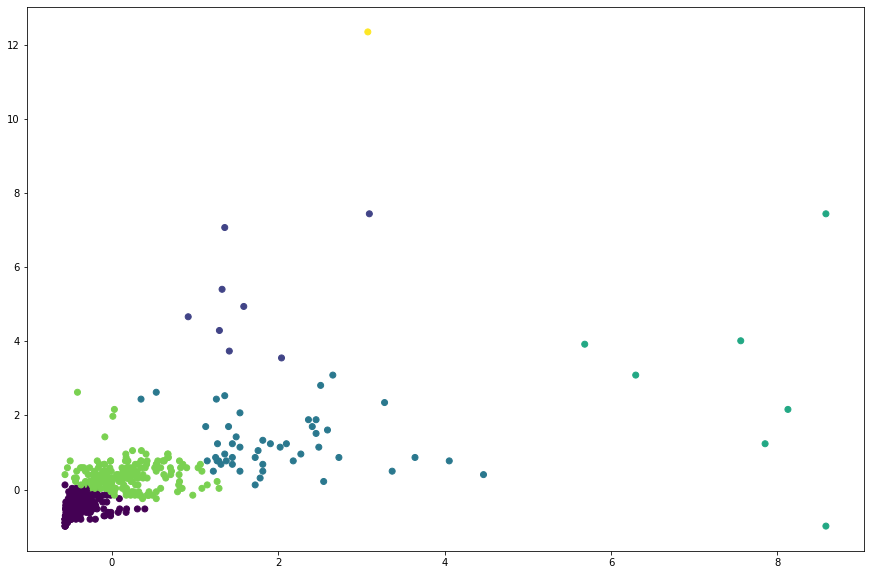

In [85]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=6).fit(alternative_st).predict(alternative_st)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'], c=km)

plt.show()

In [86]:
np.unique(gm)

array([0, 1, 2, 3, 4, 5])

In [97]:
# Evaluate with silhouette score: The Silhouette Index measure the distance between each data point, 
# the centroid of the cluster it was assigned to and the closest centroid belonging to another cluster.

from sklearn import metrics

metrics.silhouette_score(alternative_st, km, metric='euclidean')
# scores are between -1 for incorrect clustering to 1 for highly densed clustering
# a value close to 1 is good

0.5335337433555746

In [104]:
# Evaluate with Calinski-Harabasz Index
#The score is higher when clusters are dense and well separated, which relates to a standard concept 
#of a cluster.
metrics.calinski_harabasz_score(alternative_st, km)

901.9716161371728

In [110]:
# Evaluate with Davies-Bouldin Index
# a lower Davies-Bouldin index relates to a model with better separation between the clusters
# Zero is the lowest possible score. Values closer to zero indicate a better partition.

metrics.davies_bouldin_score(alternative_st, km)

0.563689920944508

#### Gaussian Mixture Models (GMMs) 

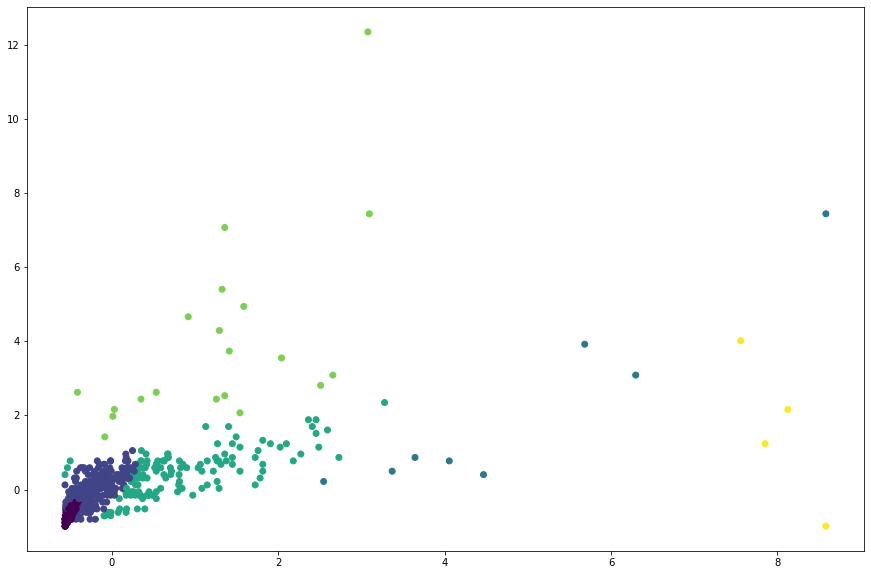

In [7]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=6).fit(alternative_st).predict(alternative_st)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'], c=gm)

plt.show()

In [80]:
np.unique(gm)

array([0, 1, 2, 3, 4, 5])

In [88]:
from sklearn import metrics

metrics.silhouette_score(alternative_st, gm, metric='euclidean')

0.34049174570888213

In [99]:
# Evaluate with Calinski-Harabasz Index
metrics.calinski_harabasz_score(alternative_st, gm)

430.1814456347859

In [106]:
# Evaluate with Davies-Bouldin Index

metrics.davies_bouldin_score(alternative_st, gm)

1.053294092454549

#### Agglomerative Clustering

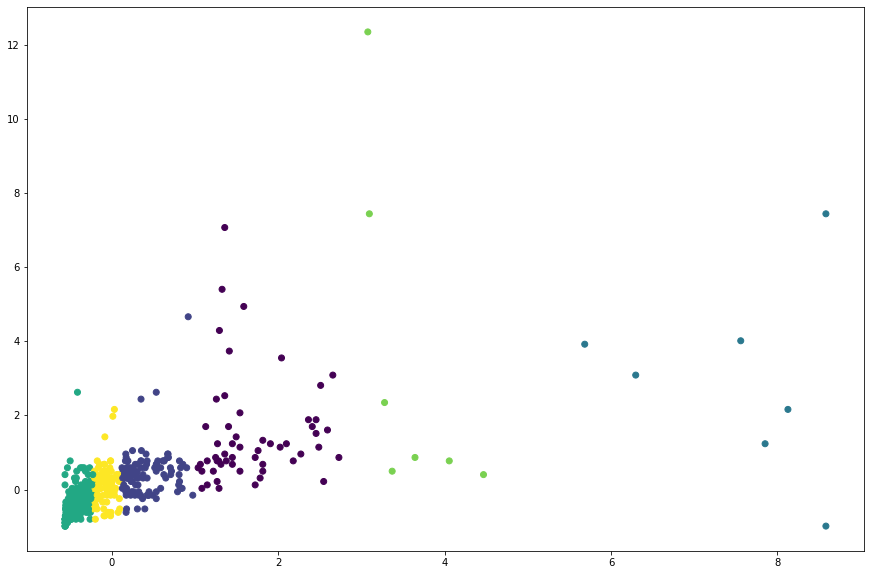

In [82]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=6).fit_predict(alternative)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'] , c=ac)
plt.show()

In [83]:
np.unique(ac)

array([0, 1, 2, 3, 4, 5])

In [84]:
from sklearn import metrics

metrics.silhouette_score(alternative_st, ac, metric='euclidean')

0.33581406916900614

In [101]:
# Evaluate with Calinski-Harabasz Index
metrics.calinski_harabasz_score(alternative_st, ac)

401.6576988124771

In [107]:
# Evaluate with Davies-Bouldin Index

metrics.davies_bouldin_score(alternative_st, ac)

1.4259468806307727

#### DBSCAN

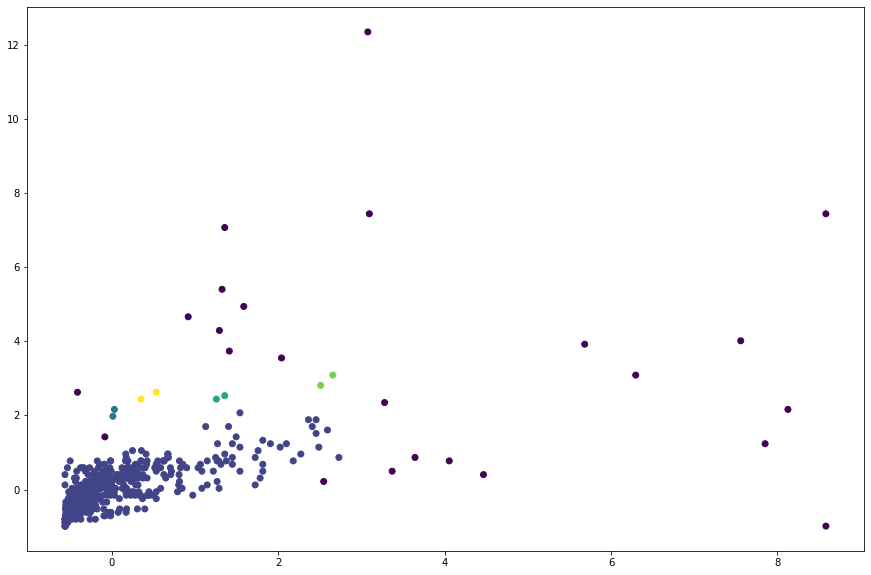

In [137]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.4, min_samples=2).fit_predict(alternative_st)
# eps = max distance between two points
# min_samples = fewest number of points in a cluster
plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'] , c=dbscan)
plt.show()

In [136]:
np.unique(dbscan)

array([-1,  0,  1,  2,  3,  4])

In [138]:
metrics.silhouette_score(alternative_st, dbscan, metric='euclidean')

0.5674985042561802

In [139]:
# Evaluate with Calinski-Harabasz Index
metrics.calinski_harabasz_score(alternative_st, dbscan)

133.17428137446697

In [141]:
metrics.davies_bouldin_score(alternative_st, dbscan)

1.7178750638902966

#### Affinity propagation

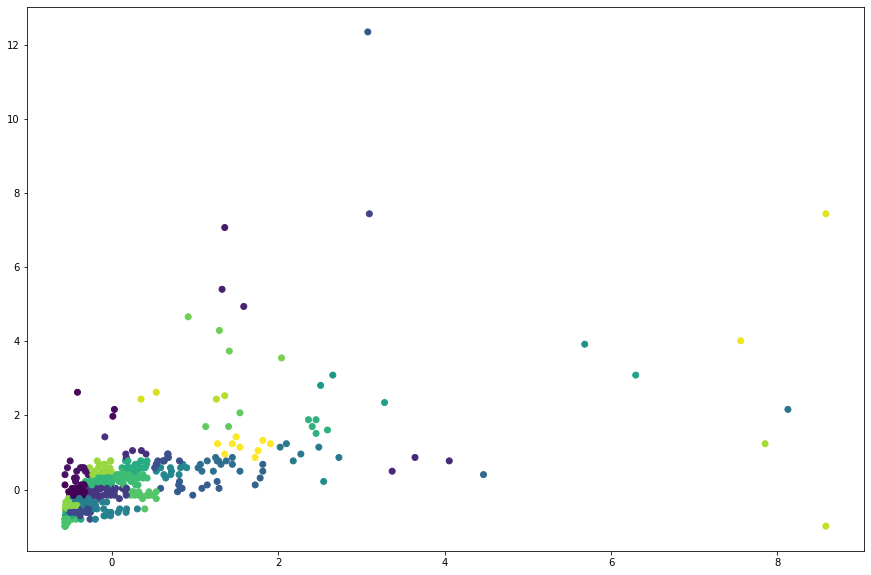

In [178]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(damping=.574, random_state=0).fit(alternative_st).predict(alternative_st)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'], c=ap)

plt.show()

In [179]:
np.unique(ap) ### impossible to make 6 clusters : is either 1 (damping = .573) or 46 (damping = .574)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [254]:
metrics.silhouette_score(alternative_st, ap, metric='euclidean')

0.3491053305774552

In [256]:
metrics.calinski_harabasz_score(alternative_st, ap)

2054.450973048626

In [257]:
metrics.davies_bouldin_score(alternative_st, ap)

0.5769506367602925

#### BIRCH

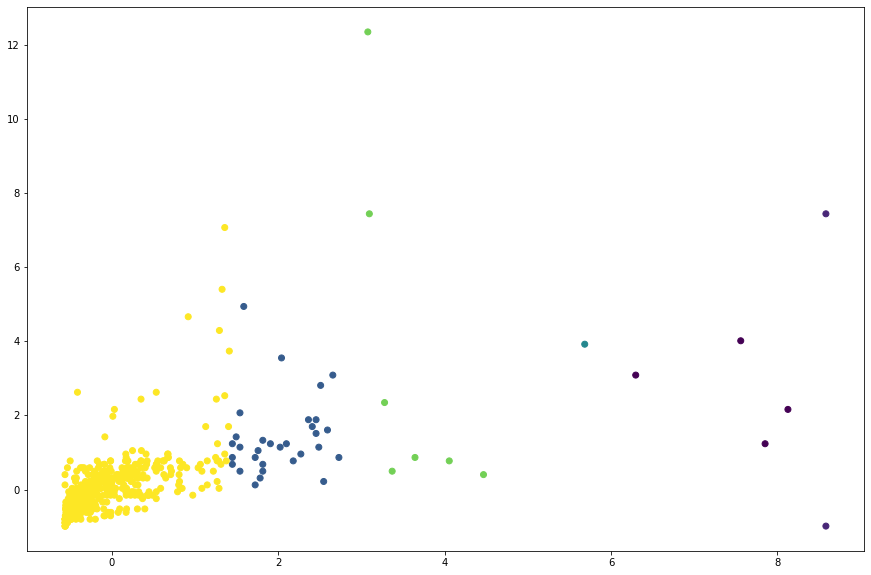

In [209]:
from sklearn.cluster import Birch

birch = Birch(threshold=0.8, n_clusters=None).fit(alternative).predict(alternative_st)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'], c=birch)

plt.show()

In [210]:
np.unique(birch)

array([ 0,  3,  8, 13, 22, 28])

In [211]:
metrics.silhouette_score(alternative_st, birch, metric='euclidean')

0.6619159140998593

In [249]:
metrics.calinski_harabasz_score(alternative_st, birch)

192.93950412214878

In [250]:
metrics.davies_bouldin_score(alternative_st, birch)

2.4155644101107647

#### Mini-Batch K-Means

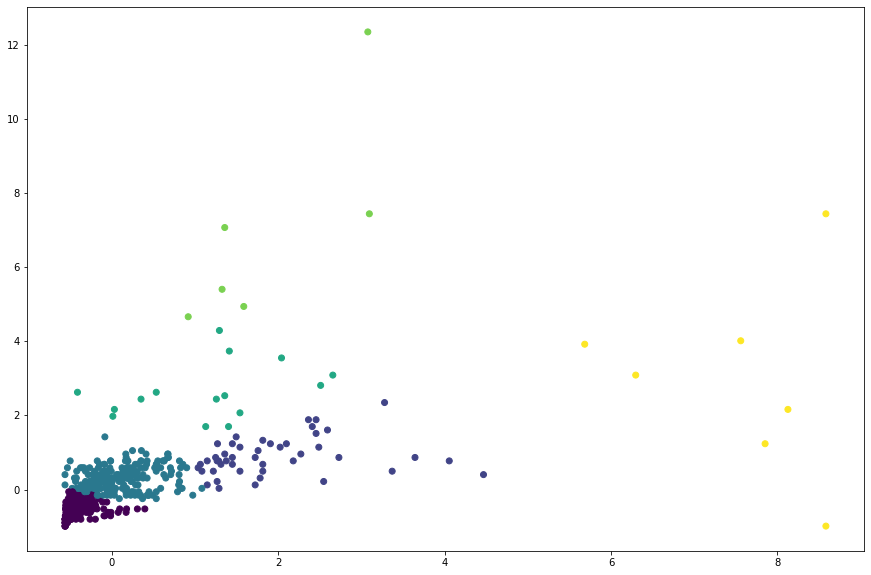

In [61]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(n_clusters=6).fit(alternative_st).predict(alternative_st)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'], c=mbk)

plt.show()

In [92]:
np.unique(mbk)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [64]:
from sklearn import metrics

metrics.silhouette_score(alternative_st, mbk, metric='euclidean')

0.524611014272806

In [102]:
# Evaluate with Calinski-Harabasz Index
metrics.calinski_harabasz_score(alternative_st, mbk)

854.8063621078705

In [108]:
# Evaluate with Davies-Bouldin Index

metrics.davies_bouldin_score(alternative_st, mbk)

0.7772542415432575

#### Spectral Clustering

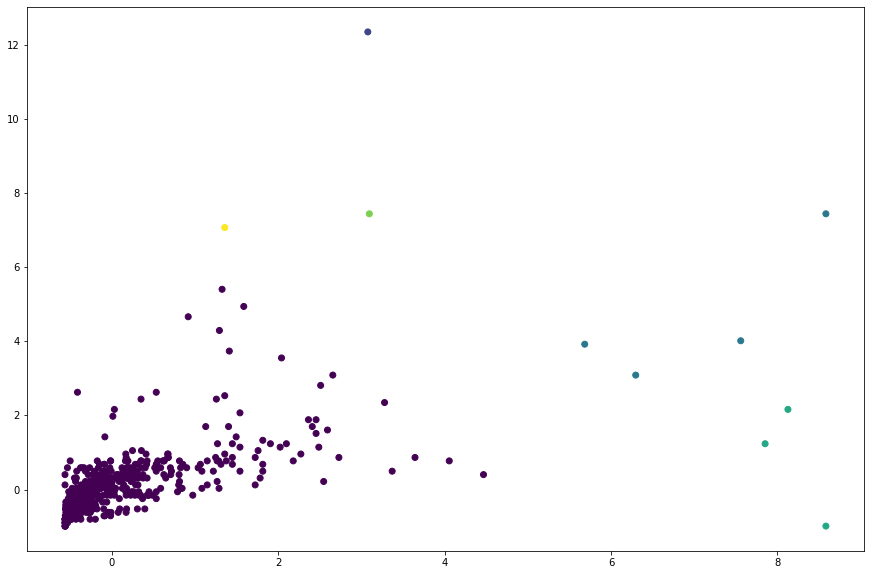

In [65]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=6).fit_predict(alternative_st)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'], c=sc)

plt.show()

In [70]:
np.unique(sc)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [73]:
from sklearn import metrics

metrics.silhouette_score(alternative_st, sc, metric='euclidean')

0.8406918777333701

In [103]:
# Evaluate with Calinski-Harabasz Index
metrics.calinski_harabasz_score(alternative_st, sc)

151.92775179126144

In [109]:
# Evaluate with Davies-Bouldin Index

metrics.davies_bouldin_score(alternative_st, sc)

0.45088188089012776

#### OPTICS

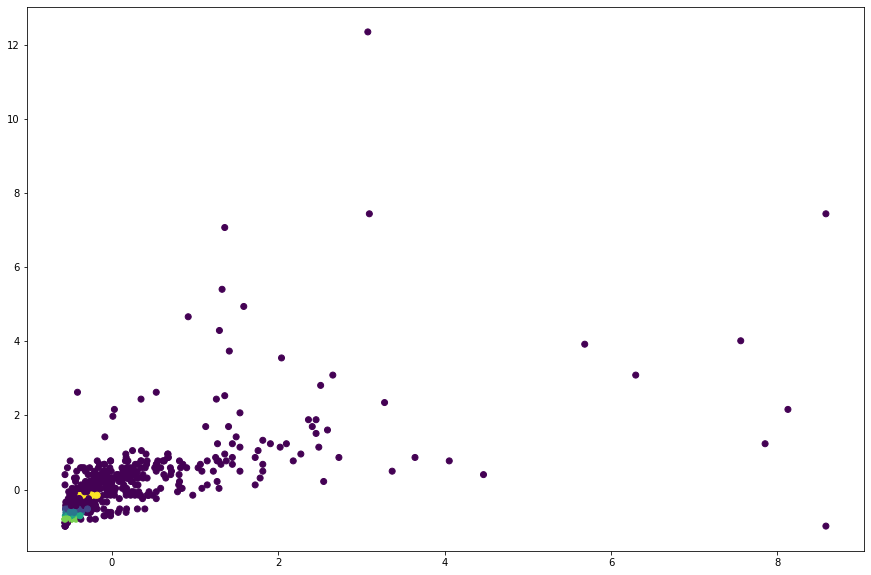

In [236]:
# very similar to DBSCAN
# better usage for large dataset (maybe good for Chipotle_drill)
from sklearn.cluster import OPTICS

optics = OPTICS(eps=.5, min_samples=30).fit_predict(alternative_st)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'], c=optics)

plt.show()

In [237]:
np.unique(optics)

array([-1,  0,  1,  2,  3,  4])

In [238]:
metrics.silhouette_score(alternative_st, optics, metric='euclidean')

-0.12371533223215808

In [240]:
metrics.calinski_harabasz_score(alternative_st, optics)

25.629553964386293

In [241]:
metrics.davies_bouldin_score(alternative_st, optics)

1.0653896585074267

### Mean Shift

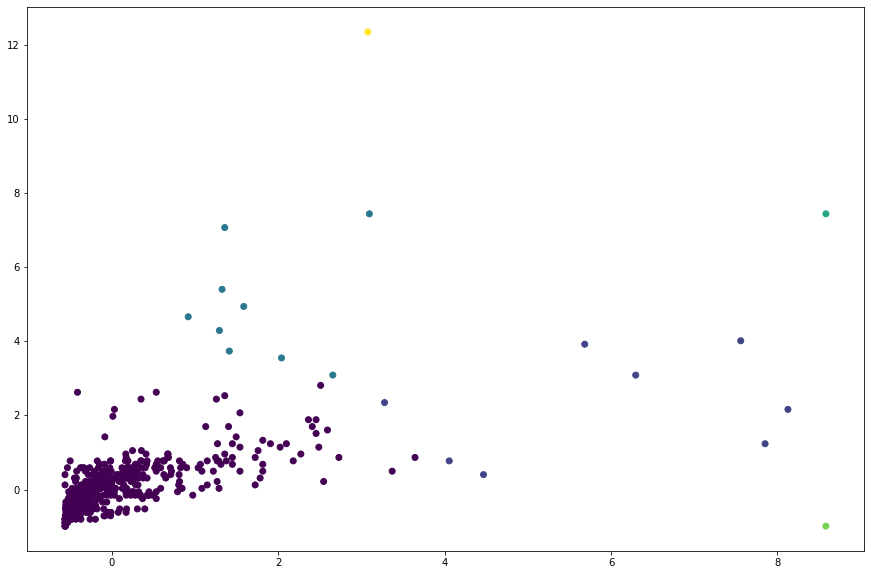

In [244]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=2).fit_predict(alternative_st)

plt.figure(figsize=(15,10))
plt.scatter(alternative_st['weight_zscore'], alternative_st['height_zscore'], c=ms)

plt.show()

In [245]:
np.unique(ms)

array([0, 1, 2, 3, 4, 5])

In [251]:
metrics.silhouette_score(alternative_st, ms, metric='euclidean')

0.804475600704423

In [252]:
metrics.calinski_harabasz_score(alternative_st, ms)

239.84659394638956

In [253]:
metrics.davies_bouldin_score(alternative_st, ms)

0.4797265603508824